In [48]:
# Install tensorflow package
%pip install tensorflow

import tensorflow as tf
from tensorflow.keras.datasets import mnist

Note: you may need to restart the kernel to use updated packages.


In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [51]:
import numpy as np

In [52]:
import matplotlib.pyplot as plt

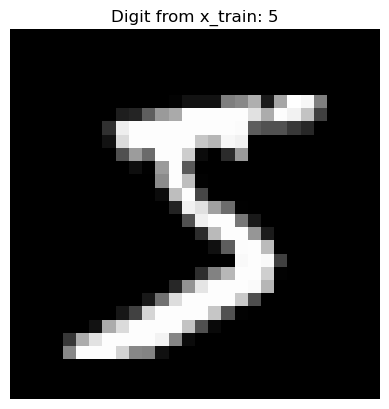

In [53]:
import matplotlib.pyplot as plt

# Select an index of the image you want to visualize
image_index = 0  # You can change this index to any value between 0 and the length of x_train or x_test

# Display the image
plt.imshow(x_train[image_index], cmap='gray')
plt.title('Digit from x_train: {}'.format(y_train[image_index]))
plt.axis('off')  # Turn off the axis
plt.show()

In [54]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Normalize the pixel values from a scale out of 255 to a scale out of 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [55]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [57]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # we have 10 digits

In [60]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
optimizer=tf.keras.optimizers.Adadelta(),
metrics=['accuracy'])

In [61]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss (before training):', score[0])
print('Test accuracy (before training):', score[1])

Test loss (before training): 2.300236225128174
Test accuracy (before training): 0.0949999988079071


In [62]:
model.fit(
    x_train, y_train, 
    batch_size=128, 
    epochs=10, 
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.1278 - loss: 2.2907 - val_accuracy: 0.3290 - val_loss: 2.2457
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.2338 - loss: 2.2400 - val_accuracy: 0.4703 - val_loss: 2.1798
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.3214 - loss: 2.1764 - val_accuracy: 0.5722 - val_loss: 2.0937
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.3910 - loss: 2.0938 - val_accuracy: 0.6578 - val_loss: 1.9780
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.4666 - loss: 1.9824 - val_accuracy: 0.7131 - val_loss: 1.8265
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.5394 - loss: 1.8378 - val_accuracy: 0.7533 - val_loss: 1.6411
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.5809 - loss: 1.6787 - val_accuracy: 0.7809 - val_loss: 1.4370
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.6224 - loss: 1.5032 - 

In [63]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9365875720977783
Test accuracy: 0.8240000009536743
